# Load Data

In [ ]:
#syntax menggunakan Pandas
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
# Tanpa delimiter=';', pandas akan mengira itu semua hanya 1 kolom karena tidak ada koma.
df = pd.read_csv('/content/gdrive/MyDrive/advertising2.csv' , delimiter=';')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,NaN,58.5,18.5
4,180.8,NaN,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
# Mengganti nama tiap kolom
df = df.rename(columns={
  'radio': 'Radio',
  'newspaper': 'Newspaper', 'sales':'Sales'
})

# Pre-processing data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      188 non-null    float64
 2   Newspaper  198 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Missing value

In [ ]:
# menggunakan isnull() untuk melihat nilai yang kosong
df.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,True,False,False
4,False,True,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [ ]:
# cari nilai yang kosong
df.isnull().sum()

,0
TV,0
Radio,12
Newspaper,2
Sales,0


In [ ]:
# isi missing values dengan nilai mean
df['Radio'] = df['Radio'].fillna(df['Radio'].mean())
df['Newspaper'] = df['Newspaper'].fillna(df['Newspaper'].mean())

In [ ]:
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


duplikasi data

In [ ]:
# melihat baris yang duplikat
df.duplicated()


,0
0,False
1,False
2,False
3,False
4,False
...,...
195,False
196,False
197,False
198,False


In [ ]:
df.duplicated().sum()

np.int64(6)

In [ ]:
# Hapus data yang duplikat
df = df.drop_duplicates()

In [ ]:
# Cek data yang duplikat lagi
df.duplicated().sum()

np.int64(0)

Cek outlier

In [ ]:
def cek_outlier_iqr(df, kolom):
    Q1 = df[kolom].quantile(0.25)
    Q3 = df[kolom].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[kolom] < lower_bound) | (df[kolom] > upper_bound)]

    print(f"\n📌 Kolom: {kolom}")
    print(f"Jumlah outlier: {len(outliers)}")
    return outliers


In [ ]:
cek_outlier_iqr(df, 'TV')
cek_outlier_iqr(df, 'Radio')
cek_outlier_iqr(df, 'Newspaper')


📌 Kolom: TV
Jumlah outlier: 0

📌 Kolom: Radio
Jumlah outlier: 0

📌 Kolom: Newspaper
Jumlah outlier: 2


,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [ ]:
median_value = df['Newspaper'].median()
df.loc[[16, 101], 'Newspaper'] = median_value


In [ ]:
def cek_outlier_iqr(df, kolom):
    Q1 = df[kolom].quantile(0.25)
    Q3 = df[kolom].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[kolom] < lower_bound) | (df[kolom] > upper_bound)]

    print(f"\n📌 Kolom: {kolom}")
    print(f"Jumlah outlier: {len(outliers)}")
    return outliers


In [ ]:
cek_outlier_iqr(df, 'TV')
cek_outlier_iqr(df, 'Radio')
cek_outlier_iqr(df, 'Newspaper')


📌 Kolom: TV
Jumlah outlier: 0

📌 Kolom: Radio
Jumlah outlier: 0

📌 Kolom: Newspaper
Jumlah outlier: 0


,TV,Radio,Newspaper,Sales


In [ ]:
# Features
features = ['TV', 'radio', 'newspaper']

# Target Variable
target = 'Sales'

In [ ]:
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

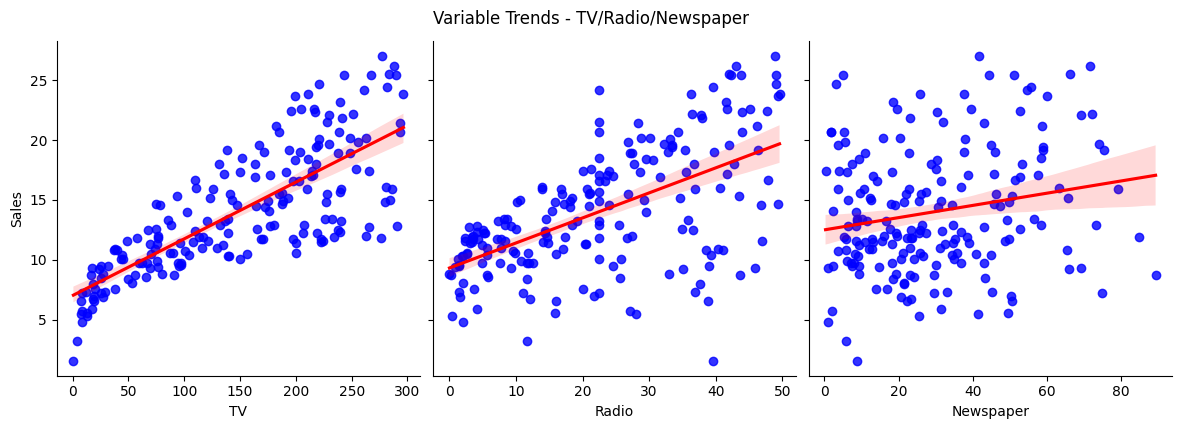

In [ ]:
g = sns.pairplot(
    df,
    x_vars=['TV', 'Radio', 'Newspaper'],
    y_vars='Sales',
    height=4,
    aspect=1,
    kind='reg',
    plot_kws={
        'scatter_kws': {'color': 'blue'},  # Scatter points in blue
        'line_kws': {'color': 'red'}       # Regression line in red
    }
)

g.fig.suptitle('Variable Trends - TV/Radio/Newspaper', y=1.05)
plt.show()

Kesimpulan: TV berkorelasi kuat, positif, dan linear dengan variabel target. Koran terlihat tidak berkorelasi.

# Analisis data & Visualisasi Data

In [ ]:
# Statistik deskriptif
df.describe()


,TV,Radio,Newspaper,Sales
count,194.000000,194.000000,194.000000,194.000000
mean,147.855670,22.489658,29.737915,14.017010
std,85.426557,14.536165,20.437371,5.198851
min,0.700000,0.000000,0.300000,1.600000
25%,75.150000,9.675000,12.650000,10.400000
50%,150.650000,22.524468,25.675000,12.900000
75%,219.475000,35.325000,44.050000,17.375000
max,296.400000,49.600000,89.400000,27.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

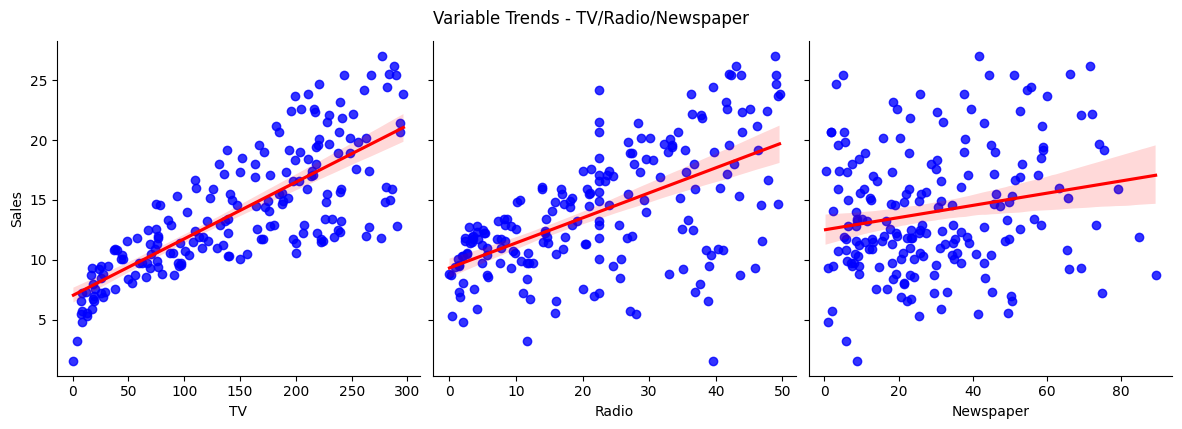

In [ ]:
g = sns.pairplot(
    df,
    x_vars=['TV', 'Radio', 'Newspaper'],
    y_vars='Sales',
    height=4,
    aspect=1,
    kind='reg',
    plot_kws={
        'scatter_kws': {'color': 'blue'},  # Scatter points in blue
        'line_kws': {'color': 'red'}       # Regression line in red
    }
)

g.fig.suptitle('Variable Trends - TV/Radio/Newspaper', y=1.05)
plt.show()

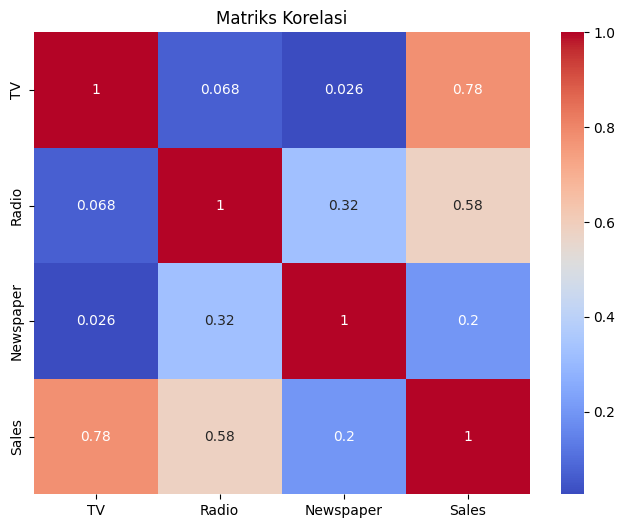

In [ ]:
# Korelasi dan heatmap
corr = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()


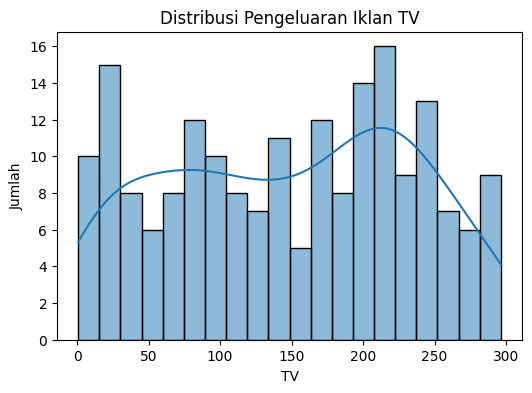

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.histplot(data=df, x='TV', bins=20, kde=True)
plt.title('Distribusi Pengeluaran Iklan TV')
plt.xlabel('TV')
plt.ylabel('Jumlah')
plt.show()

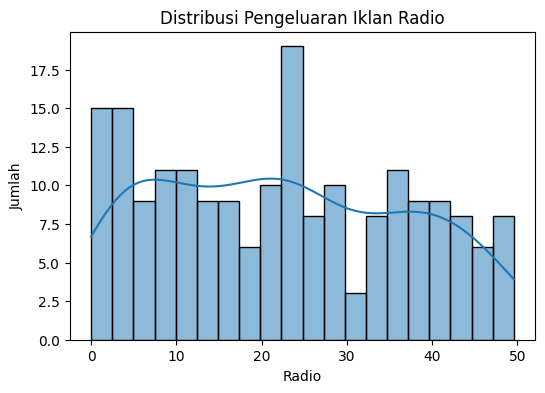

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Radio', bins=20, kde=True)
plt.title('Distribusi Pengeluaran Iklan Radio')
plt.xlabel('Radio')
plt.ylabel('Jumlah')
plt.show()


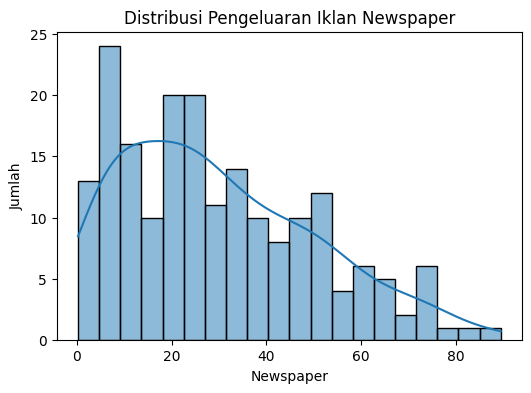

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Newspaper', bins=20, kde=True)
plt.title('Distribusi Pengeluaran Iklan Newspaper')
plt.xlabel('Newspaper')
plt.ylabel('Jumlah')
plt.show()